Write a one paragraph summary of the findings in Lalonde (1986) regarding the effects of the National Supported Work Demonstration (NSW) job training program on earnings. This study is described in the Mixtape, p. 134-139. Make sure to refer to the problems associated with the non-experimental data.

We know that  NSW, because it was randomized, has a treatment effect of $\$900$ to $\$1800$. However, instead of using the experimental group data, Lalonde uses the CPS for a noonexperimental control group and evaluates popular econometric methods to see if they were accurate in getting the $\$900$ figure. However, many econometric methods gave the wrong sign, because of selection bias.

Download the nsw_psid.dta (https://www.ifs.org.uk/publications/6285) from Barbara Sianesi’s presentation given to the 2010 German Stata Users Group in Berlin. Click on download full report. Replicate the nearest neighbor matching example in the tutorial video (https://www.youtube.com/watch?v=VYUjfFWPENM) using age, black, hispanic, married, educ, nodegree, and re75 as control variables. Interpret your findings.

In [4]:
clear 
use nsw_psid.dta
summ



(NSW treated and PSID non-treated)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     treated |      2,787    .1065662    .3086163          0          1
         age |      2,787    33.76103     10.5875         17         55
        age2 |      2,787    1251.862     767.585        289       3025
        educ |      2,787    11.93183    3.021046          0         17
       black |      2,787    .3092931    .4622852          0          1
-------------+---------------------------------------------------------
    hispanic |      2,787    .0391102    .1938918          0          1
     married |      2,787    .7918909    .4060281          0          1
    nodegree |      2,787    .3505562    .4772298          0          1
        re75 |      2,787    17358.57    13858.84          0   156653.2
        re78 |      2,787    19893.88    15632.63          0   121173.6


In [10]:
net install st0026_2

file http://www.stata.com/st0026_2.pkg not found
could not load st0026_2.pkg from http://www.stata.com/


r(601);


In [5]:
global treatment treated
global ylist re78
global xlist age black hispanic married educ nodegree re75 
global breps 100

In [6]:
bysort $treatment: summarize $ylist $xlist


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> treated = 0

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        re78 |      2,490    21553.92    15555.35          0   121173.6
         age |      2,490     34.8506    10.44076         18         55
       black |      2,490    .2506024     .433447          0          1
    hispanic |      2,490    .0325301    .1774389          0          1
     married |      2,490    .8662651    .3404357          0          1
-------------+---------------------------------------------------------
        educ |      2,490    12.11687    3.082435          0         17
    nodegree |      2,490    .3052209    .4605934          0          1
       

In [7]:
logit treated age educ black hispanic married educ nodegree re75


note: educ omitted because of collinearity
Iteration 0:   log likelihood = -945.56046  
Iteration 1:   log likelihood = -647.98458  
Iteration 2:   log likelihood =  -432.5301  
Iteration 3:   log likelihood = -368.49031  
Iteration 4:   log likelihood = -363.71977  
Iteration 5:   log likelihood = -363.66961  
Iteration 6:   log likelihood =  -363.6696  

Logistic regression                             Number of obs     =      2,787
                                                LR chi2(7)        =    1163.78
                                                Prob > chi2       =     0.0000
Log likelihood =  -363.6696                     Pseudo R2         =     0.6154

------------------------------------------------------------------------------
     treated |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.0892189   .0125414    -7.11   0.000    -.1137995   -.0646382
       

In [8]:
predict pscore

(option pr assumed; Pr(treated))


In [12]:
teffects nnmatch (re78 age black hispanic married educ nodegree re75) (treated)


Treatment-effects estimation                   Number of obs      =      2,787
Estimator      : nearest-neighbor matching     Matches: requested =          1
Outcome model  : matching                                     min =          1
Distance metric: Mahalanobis                                  max =          6
------------------------------------------------------------------------------
             |              AI Robust
        re78 |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
ATE          |
     treated |
   (1 vs 0)  |  -11390.82   1713.274    -6.65   0.000    -14748.77   -8032.862
------------------------------------------------------------------------------


In [1]:
clear
use "http://scunning.com/teaching/nsw_dw" //experimental treatment and control units
sum re78 if treat ==1
gen y1= r(mean)
sum re78 if treat ==0
gen y0= r(mean)
gen ate = y1 - y0
summ ate

reg re78 i.treat





    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        re78 |        185    6349.144    7867.402          0   60307.93



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        re78 |        260    4554.801    5483.836          0   39483.53




    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         ate |        445    1794.342           0   1794.342   1794.342


      Source |       SS           df       MS      Number of obs   =       445
-------------+----------------------------------   F(1, 443)       =      8.04
       Model |   348013183         1   348013183   Prob > F        =    0.0048
    Residual |  1.9178e+10       443  43290369.3   R-squared       =    0.0178
-------------+---------








(2,239 real changes made)


(2,037 real changes made)






Iteration 0:   log likelihood = -1014.0378  
Iteration 1:   log likelihood = -682.84126  
Iteration 2:   log likelihood = -557.86516  
Iteration 3:   log likelihood = -535.14145  
Iteration 4:   log likelihood =    -533.02  
Iteration 5:   log likelihood = -532.97079  
Iteration 6:   log likelihood = -532.97068  
Iteration 7:   log likelihood = -532.97068  

Logistic regression                             Number of obs     =     16,437
                                                LR chi2(14)       =     962.13
                                                Prob > chi2       =     0.0000
Log likelihood = -532.97068                     Pseudo R2         =     0.4744

------------------------------------------------------------------------------
       treat |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   1

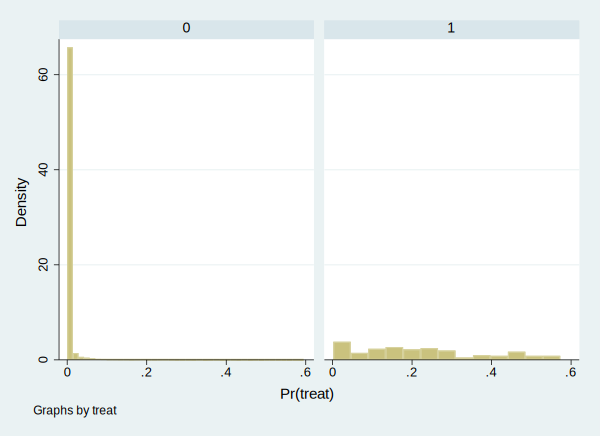

In [2]:
append using "http://scunning.com/teaching/cps_controls"
gen agesq = age*age
gen agecube=age^3
ren education school
gen schoolsq = school^2
gen u74 = 0 if re74!=.
replace u74 = 1 if re74==0
gen u75 = 0 if re75!=.
replace u75 = 1 if re75==0
gen interaction1 = school*re74
gen re74sq=re74^2
gen re75sq=re75^2
gen interaction2 = u74*hisp



logit treat age agesq agecube school schoolsq married ///
nodegree black hispanic re74 re75 u74 u75 interaction1

predict pscore //predicting propensity scores

hist pscore, by(treat) binrescale

In [3]:
gen re78_scaled = re78/10000 //rescale because teffects command doesn't perform well with large values

//this will first give you an error bc some observations are very close to zero (violating the common support assumption)

cap n teffects ipw (re78_scaled) (treat age agesq agecube school schoolsq married nodegree black ///
hispanic re74 re75 u74 u75 interaction1, logit), osample(overlap)

keep if overlap == 0 //we only keep observations that do not violate the common support assumption

drop overlap
cap n teffects ipw (re78_scaled) (treat age agesq agecube school schoolsq married nodegree black ///
hispanic re74 re75 u74 u75 interaction1, logit), osample(overlap)

display  "ATE =" -0.700730*10000 //scale back




treatment 1 has 593 propensity scores less than 1.00e-05
treatment overlap assumption has been violated by observations identified in variable osample(overlap)

(593 observations deleted)



Iteration 0:   EE criterion =  5.442e-25  
Iteration 1:   EE criterion =  1.101e-31  

Treatment-effects estimation                    Number of obs     =     15,844
Estimator      : inverse-probability weights
Outcome model  : weighted mean
Treatment model: logit
------------------------------------------------------------------------------
             |               Robust
 re78_scaled |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
ATE          |
       treat |
   (1 vs 0)  |  -.7007306   .0949984    -7.38   0.000     -.886924   -.5145372
-------------+----------------------------------------------------------------
POmean       |
       treat |
          0  |   1.429349   .0076999   185.63   0.0

In [4]:
drop if pscore <=0.05
drop overlap
cap n teffects ipw (re78_scaled) (treat age agesq agecube school schoolsq married nodegree black ///
hispanic re74 re75 u74 u75 interaction1, logit), osample(overlap)

display "ATE=" 0.0918435*10000



(15,111 observations deleted)


note: hispanic omitted because of collinearity

Iteration 0:   EE criterion =  8.312e-22  
Iteration 1:   EE criterion =  3.139e-31  

Treatment-effects estimation                    Number of obs     =        733
Estimator      : inverse-probability weights
Outcome model  : weighted mean
Treatment model: logit
------------------------------------------------------------------------------
             |               Robust
 re78_scaled |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
ATE          |
       treat |
   (1 vs 0)  |   .0918435   .0593747     1.55   0.122    -.0245287    .2082158
-------------+----------------------------------------------------------------
POmean       |
       treat |
          0  |   .4760813    .024117    19.74   0.000     .4288128    .5233498
------------------------------------------------------------------------------

ATE=